<a href="https://colab.research.google.com/github/katherymbr/PD1_5-Trans_FOURIER/blob/main/PDI_5_T_Fourier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PROCESAMIENTO DIGITAL DE IMAGENES (PDI)
---

PRACTICO No. 5.




---


**Transformada Directa e inversa de Fourier**
---


```
Estudiante: Katherym Bambague Ruíz
```




**OBJETIVO DE LA PRÁCTICA**


implementar un aplicativo que permita la generación de la Transformada de Fourier (TF) directa e Inversa de Imágenes, este debe permitir:

*  Cargar una imagen

*  Generar la TF directa de la imagen y ver su espectro
A partir del espectro generado mediante la TF inversa obtener la imagen

*  Debe permitir guardar el espectro de amplitud de una imagen en un bitmap

*  Debe permitir cargar el espectro de imagen a partir de un bitmap
Para esto se deben hacer pruebas con diferentes figuras geométricas (Cuadrados, rectángulos, círculos, elipses, rombos, dos o más objetos, etc.) (mostrar los espectros de mínimo 5 figuras diferentes)
Adicionalmente con una imagen de su elección guardar el espectro de amplitud de la imagen en un bitmap, luego editarlo con un editor gráfico (por ejemplo, Paint), cargarlo al aplicativo y finalmente aplicar la transformada inversa (preservando la fase) para ver los efectos.


# Importo Librerias

In [111]:
# IMPORTO LAS LIBRERIAS

import numpy as np
import matplotlib.pyplot as plt
import imageio
from scipy import fftpack

# Funciones

In [112]:
# FUNCIÓN PARA LEER LAS IMÁGENES

def leer_imagen(rute):
     imagen= imageio.imread(rute)
     return (imagen)

ruta= '/content/drive/MyDrive/'

In [113]:
# FUNCIÓN PARA GRAFICAR 3 IMAGENES EN FORMA HORONTAL CON TÍTULO

def graficar_tresimagenes_horizontal(imagen_oscura, imagen_brillante, imagen_oscurapadding):
  fig, ax = plt.subplots(1, 3, dpi=400)
  ax[0].imshow(imagen_oscura, cmap='gray')  # DEBE SER LA IMAGEN DELA PADING, NO LA IMAGEN
  ax[0].set_axis_off()
  ax[0].set_title('Imagen 1', fontsize=3)
  #print('imagen_1, imagen_2 , imagen_3')
  ax[1].imshow(imagen_brillante, cmap='gray')
  ax[1].set_axis_off()
  ax[1].set_title('Imagen 2',fontsize=3)
  ax[2].imshow(imagen_oscurapadding, cmap='gray')
  ax[2].set_axis_off()
  ax[2].set_title('Imagen 3', fontsize=3)
  plt.show()

In [114]:
#FUNCIÓN PARA GRAFICAR 3 IMAGENES HORIZONTAL INTRODUCIENDO TÍTULO

def graficar_tresimagenes_horizontaltitulo(imagen_oscura, imagen_brillante, imagen1, titulo1, titulo2, titulo3, tamaño=400):
    fig, ax = plt.subplots(1,3, dpi=tamaño)
    ax[0].imshow(imagen_oscura, cmap='gray')  
    ax[0].set_axis_off()
    ax[0].set_title(str(titulo1), fontsize=5)
    #plt.title(str(titulo1))
    ax[1].imshow(imagen_brillante, cmap='gray')
    ax[1].set_axis_off()
    ax[1].set_title(str(titulo2), fontsize=5)
    #plt.title(str(titulo2))
    ax[2].imshow(imagen1, cmap='gray')
    ax[2].set_axis_off()
    ax[2].set_title(str(titulo3), fontsize=5)
    plt.show()


In [115]:
# FUNCIÓN PARA GRAFICAR 3 IMAGENES EN FORMA HORONTAL CON TÍTULO PREVIAMNETE PUESTO

def graficar_tresimagenes_horizontal(imagen_oscura, imagen_brillante, imagen_oscurapadding):
  fig, ax = plt.subplots(1, 3, dpi=400)
  ax[0].imshow(imagen_oscura, cmap='gray')  
  ax[0].set_axis_off()
  ax[0].set_title('imagen', fontsize=8)
  print('imagen_1, imagen_2 , imagen_3')
  ax[1].imshow(imagen_brillante, cmap='gray')
  ax[1].set_axis_off()
  ax[1].set_title('imagen2',fontsize=8)
  ax[2].imshow(imagen_oscurapadding, cmap='gray')
  ax[2].set_axis_off()
  ax[2].set_title('imagen3', fontsize=8)
  plt.show()

In [116]:
# FUNCIÓN PARA DESCOMPONER LA IMAGEN EN SUS CANALES R,G,B

def image_to_rgb(imagen):
  r = imagen[:,:,0]/255.0
  g = imagen[:,:,1]/255.0
  b = imagen[:,:,2]/255.0
  return r, g, b


In [117]:
# FUNCIÓN PARA PASAR DE RGB A YIQ

def rgb_yiq (r1,g1,b1):

  y= 0.299*r1  +0.587*g1   +0.11*b1 
  i= 0.596*r1  -0.274*g1   -0.322*b1
  q= 0.211*r1  -0.523*g1   +0.312*b1
  return(y,i,q)

In [118]:
# FUNCIÓN PARA PASAR DE YIQ A RGB

def yiq_rgb(y1,i1,q1):

  r_inverso=  (y1 + 0.9663*i1 + 0.6210*q1)*255
  g_inverso=  (y1 - 0.2721*i1 - 0.6474*q1)*255
  b_inverso=  (y1 - 1.1070*i1 + 1.7046*q1)*255
  return (r_inverso, g_inverso, b_inverso)

In [153]:
#  Función generalizada para la modificación de la Magnitud - Transformada inversa 2

def tfinversa_magmodificada(marie_curie):
  magnitud_desescalada2= np.power(10, (marie_curie[:,:,2]/25)-3.5)
  print('valor minimo y valor máximo de la magnitud escalada')
  print('')
  print('valor minimo:', magnitud_desescalada2.min())
  print('valor máximo:', magnitud_desescalada2.max())
  # construyo el nro imaginario de la forma a+bj, usando la identidad de euler
  numero_imaginario2= magnitud_desescalada2*np.cos(fase) + magnitud_desescalada2*np.sin(fase)*1j
  nuevo_y2 = np.fft.ifft2(np.fft.ifftshift(numero_imaginario2)) #numpy  
  #print(numero_imaginario2)
  plt.imshow(np.abs(nuevo_y2), cmap='gray')

# Ejecuto las funciones

tamaño de la imagen (2000, 3000, 3)



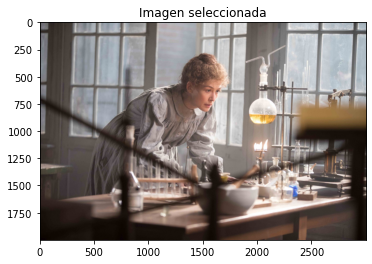

In [119]:
# leo la imagen

imagen1= leer_imagen(ruta+'curie3.jpg')
plt.imshow(imagen1)
print('tamaño de la imagen', imagen1.shape)
plt.title('Imagen seleccionada') # Titulo de la imagen
print("")

# Cargo las imágenes

In [140]:
imagen_rgb= imagen1
circulo= leer_imagen(ruta+'tf1.jpeg')
rectangulo= leer_imagen(ruta+'tf2.jpeg')
con_ruido= leer_imagen(ruta+'tf3.jpeg')
patron_periodico1= leer_imagen(ruta+'tf4.jpeg')
patron_periodico2= leer_imagen(ruta+'tf5.jpeg')
patron_periodico3= leer_imagen(ruta+'tf6.jpeg')
patron_periodico4= leer_imagen(ruta+'tf7.jpeg')
patron_periodico5= leer_imagen(ruta+'tf8.jpeg')

In [121]:
# Descompongo la imagen en RGB

r1,g1,b1= image_to_rgb(imagen1)
print('imagen en R,G,B')
#graficar_tresimagenes_horizontal(r1,g1,b1)


imagen en R,G,B


imagen en Y, I,Q


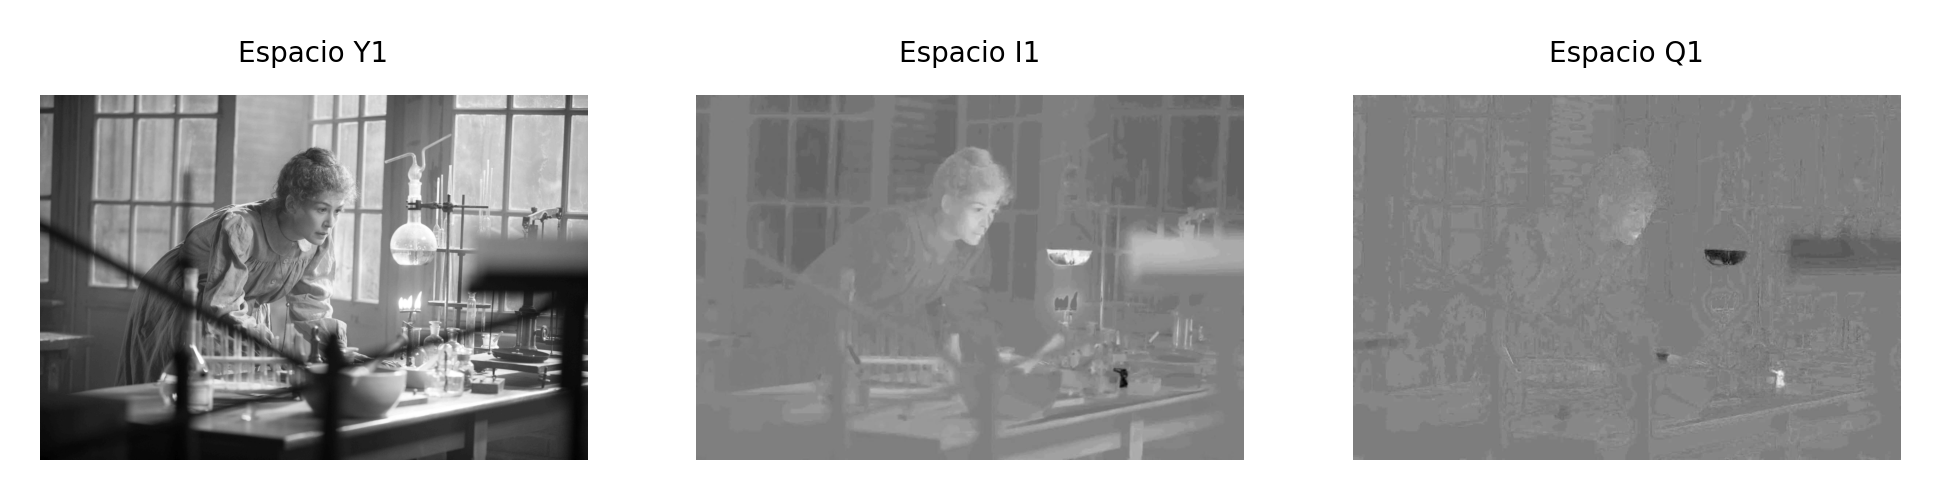

In [122]:
# paso la imagen de RGB al espacio YIQ

y1,i1,q1= rgb_yiq (r1,g1,b1)
print('imagen en Y, I,Q')
graficar_tresimagenes_horizontaltitulo(y1, i1, q1, 'Espacio Y1', 'Espacio I1', 'Espacio Q1')

# Transformada directa de Fourier

# a. Generalizo la Transformada directa de Fourier en una FUNCIÓN

In [145]:
def transformada_directa(imagen1):
  r1,g1,b1= image_to_rgb(imagen1)
  y1,i1,q1= rgb_yiq (r1,g1,b1)
  fc = np.fft.fftshift(np.fft.fft2(y1))
  magnitud = np.abs(fc)  
  global fase
  fase = np.angle(fc)
  print('valor minimo y valor máximo de la magnitud inicial')
  print('')
  print('valor minimo MAGNITUD:', magnitud.min())
  print('valor máximo MAGNITUD:', magnitud.max())
  # hago escalado de la MAGNITUD, para que el valor mínimo y máximo vaya de 0 aprox 230
  magnitud_escalada=(np.log10(magnitud)+3.5)*25
  print('valor minimo y valor máximo de la magnitud escalada')
  print('')
  print('valor minimo MAGNITUD ESCALADA:', magnitud_escalada.min())
  print('valor máximo MAGNITUD ESCALADA:', magnitud_escalada.max())
  graficar_tresimagenes_horizontaltitulo(y1, magnitud_escalada, fase, 'Espacio Y', ' Magnitud Escalada - Transformada Directa', 'Fase')
  magnitud_escalada= magnitud_escalada.astype('uint8')
  return(magnitud_escalada)
  #Guardo la imagen en formato bmp
  #imagen_guardadatf= imageio.imwrite('magnitud.bmp', magnitud_escalada)
  #plt.imshow(imagen_guardadatf)

In [129]:
# Guardo la imagen en formato bmp

imageio.imwrite('magnitud.bmp', magnitud_escalada)

# b. Generalizo la Transformada Inversa de Fourier en una Función

In [146]:
def transformada_inversa(magnitud_escalada):
 # magnitud_escalada= imagen_inversa
  #imagen_inversa= magnitud_escalada
  #imagen_inversa= imageio.imread(imagentf)
  print('valor minimo:', magnitud_escalada.min())
  print('valor máximo:', magnitud_escalada.max())
  print('Visualizo la Transformada de Fourier que guarde en formato .bmp')
  plt.title('Imagen guardada con TF .bmp') # Titulo de la imagen
  plt.imshow(magnitud_escalada, cmap='gray')
  print("")
  # hago el desescalado de la imagen, para lo cual aplico las operaciones inversas
  magnitud_desescalada=np.power(10, (magnitud_escalada/25)-3.5)
  print('valor minimo y valor máximo de la magnitud escalada')
  print('')
  print('valor minimo:', magnitud_desescalada.min())
  print('valor máximo:', magnitud_desescalada.max())
  # construyo el nro imaginario de la forma a+bj, usando la identidad de euler
  numero_imaginario= magnitud_desescalada*np.cos(fase) + magnitud_desescalada*np.sin(fase)*1j
  nuevo_y = np.fft.ifft2(np.fft.ifftshift(numero_imaginario)) #numpy  
  print(numero_imaginario)
  plt.imshow(np.abs(nuevo_y), cmap='gray')
  plt.title('Imagen Original obtenida aplicando TF INVERSA') # Titulo de la imagen
  print("")


# Aplicativo interactivo

You selected imagen_rgb
Seleccionó: IMAGEN_RGB:
You selected Directa
valor minimo y valor máximo de la magnitud inicial

valor minimo MAGNITUD: 0.0023814674614952877
valor máximo MAGNITUD: 2777235.146180392
valor minimo y valor máximo de la magnitud escalada

valor minimo MAGNITUD ESCALADA: 21.921116300719046
valor máximo MAGNITUD ESCALADA: 248.59031631645308


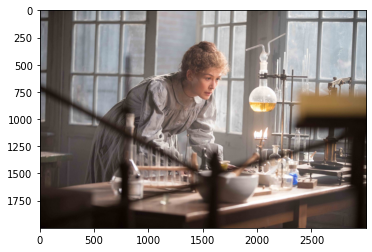

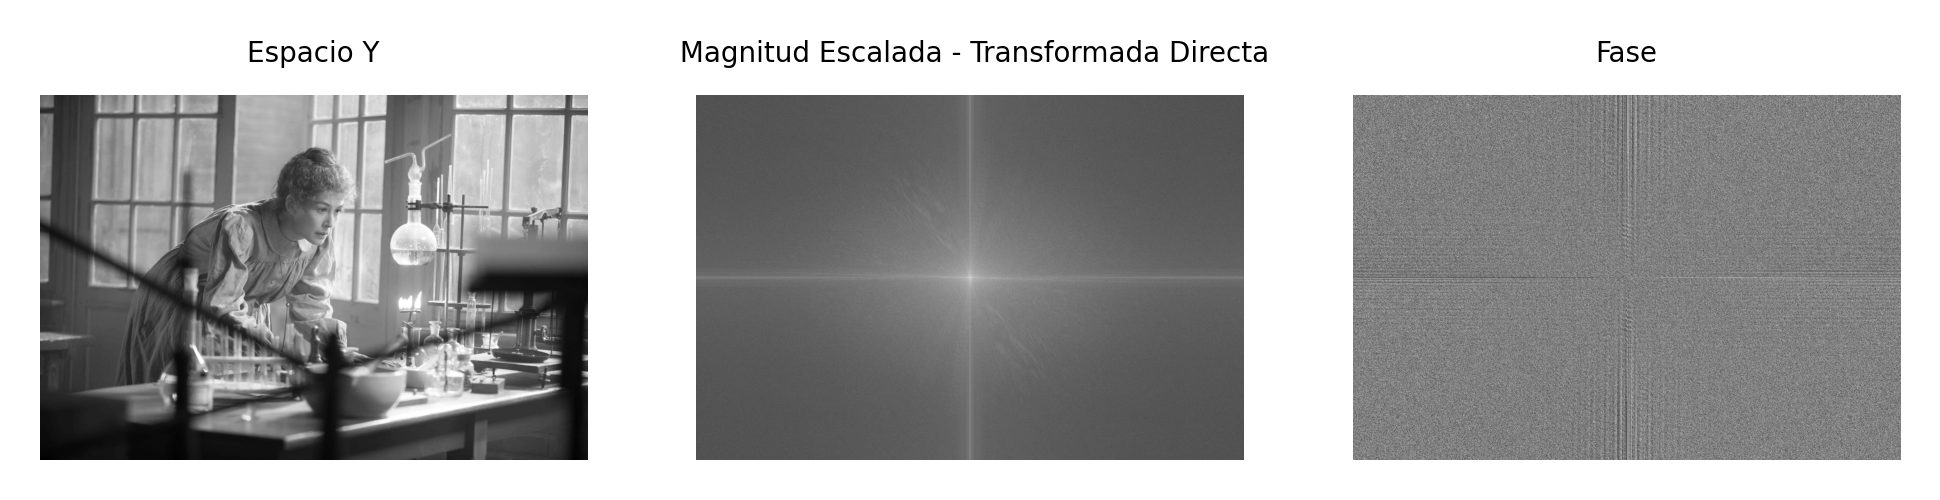

In [158]:
#@title SELECCIONE: { run: "auto" }

Imagen = "imagen_rgb" #@param ["imagen_rgb","circulo", "rectangulo", "con_ruido", "patron_periodico1", "patron_periodico2", "patron_periodico3", "patron_periodico4"]
print('You selected', Imagen)


if  Imagen=="circulo": 
  yop_imagen= np.copy(circulo)
  print('Seleccionó: CIRCULO:')
  plt.imshow(yop_imagen)

elif Imagen=="imagen_rgb": 
  yop_imagen= np.copy(imagen_rgb)
  print('Seleccionó: IMAGEN_RGB:')
  plt.imshow(yop_imagen)
  
elif Imagen=="rectangulo": 
  yop_imagen= np.copy(rectangulo)
  print('Seleccionó: RECTANGULO:')
  plt.imshow(yop_imagen)

elif Imagen=="con_ruido": 
  yop_imagen= np.copy(con_ruido)
  print('Seleccionó: CON_RUIDO:')
  plt.imshow(yop_imagen)
  
elif Imagen=="patron_periodico1": 
  yop_imagen= np.copy(patron_periodico1)
  print('Seleccionó: PATRON_PERIODICO1:')
  plt.imshow(yop_imagen)

else:
  Imagen=="patron_periodico4"
  yop_imagen= np.copy(patron_periodico4)
  print('Seleccionó: PATRON_PERIODICO4:')
  plt.imshow(yop_imagen)


Transformada = "Directa" #@param ["Directa", "Inversa"]
print('You selected', Transformada)

if  Transformada=="Directa": 
  imagentf= transformada_directa(yop_imagen)
  # Guardo la imagen en formato bmp
  imageio.imwrite('transformada_directa.bmp', imagentf)
else:
  Transformada=="Inversa"
  imagen_tfdleida=imageio.imread('transformada_directa.bmp')
  transformada_inversa(imagen_tfdleida)

# Modificación de la Magnitud



Para esta actividad seleccionamos la imagen de  Marie Curie y la imagen de Lena, y mediante el editor de paint realizamos modificaciones, posteriormente estas modificaciones las subimos al aplicativo y le realizamos la transformada inversa, con lo cual analizamos en que se modifica la imagen

In [154]:
# Cargo las imagenes con la transformada directa pero modificadas su magnitud y en formato bmp

marie_curie= leer_imagen(ruta+'transformada_directa.bmp')
lena_coninterferencia= leer_imagen(ruta+'transformada_directa15.bmp')

*   **Caso No.1**

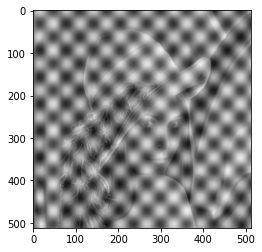

In [155]:
# Tomo la imagen de Lena con una imterferencia Aditiva

plt.imshow(patron_periodico1)

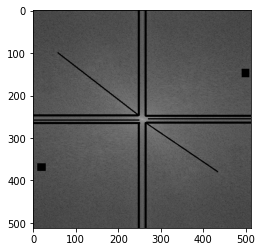

In [138]:
# Modifico en Paint la fase obtenida en la transformada Directa de Fourier, con la finalidad de corregir la interferencia

lena_coninterferencia= leer_imagen(ruta+'transformada_directa15.bmp')
plt.imshow(lena_coninterferencia)

valor minimo y valor máximo de la magnitud escalada

valor minimo: 0.00031622776601683794
valor máximo: 38018.93963205613


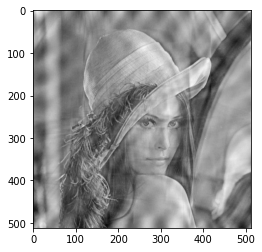

In [157]:
# A la magnitud Modificada, le aplico la transdormada inversa de Fourier

tfinversa_magmodificada(lena_coninterferencia)

*  **CONCLUSIÓN**

La transformada de Fourier es una excelente opción para modificar imagenes que tengan interferencia aditiva, ya que mediante una transformada directa se obtiene la magnitud de la imagen. En el diagrama de magnitud se puede localizar la interferencia en el espectro, editar el espectro, eliminar las energias a dichas frecuencias y mejorar la calidad de las imagenes.